### Fish Weight Prediction


In [1]:
#importing the necessary labraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.listdir()

['.ipynb_checkpoints', 'Fish dataset.csv', 'Untitled.ipynb']

#### Importing the dataset 

In [4]:
fish = pd.read_csv('Fish dataset.csv')

In [20]:
fish.columns = fish.columns.str.lower()
fish.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [19]:
fish.shape

(159, 7)

In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Vizualising the data

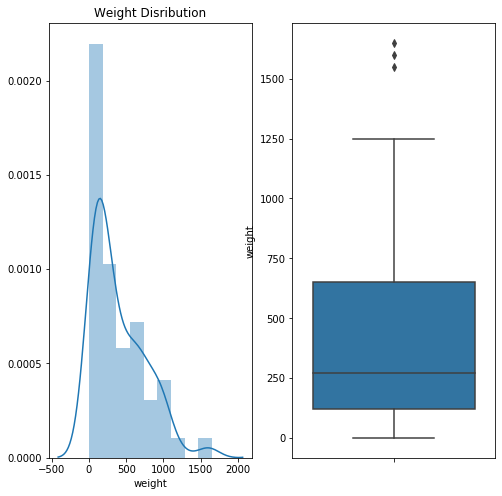

In [21]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
sns.distplot(fish.weight)
plt.title('Weight Disribution')

plt.subplot(1,2,2)
sns.boxplot(y=fish['weight'])

##### Distribution plot show that large percentage count of weight is between 0-500 

In [24]:
fish.weight.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,1])

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
80%       700.000000
90%       930.000000
100%     1650.000000
max      1650.000000
Name: weight, dtype: float64

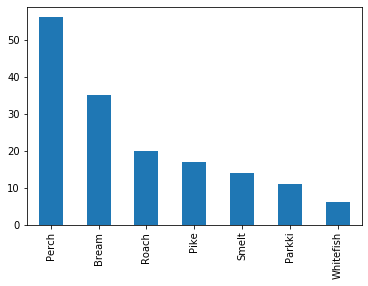

In [26]:
fish.species.value_counts().plot(kind='bar')

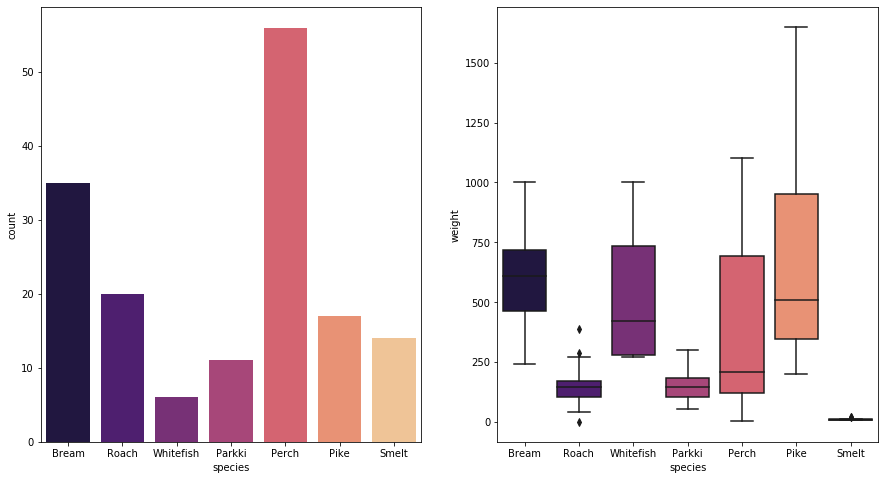

In [29]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(fish.species,palette=('magma'))

plt.subplot(1,2,2)
sns.boxplot(fish.species,fish.weight,palette=('magma'))

##### It seems that most number of fish species are perch and pike seems to be most heaviest fish among all

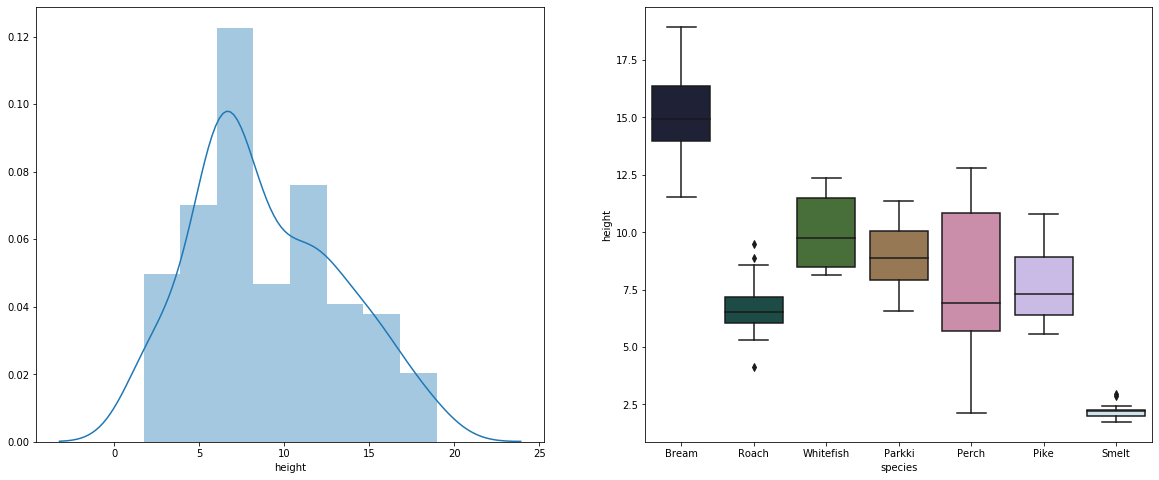

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(fish.height)

plt.subplot(1,2,2)
sns.boxplot(fish.species,fish.height,palette=('cubehelix'))

##### Species 'Bream' have greater height than all other fishes.
##### 'Perch' fish have smaller height


Text(0, 0.5, 'Avg Height')

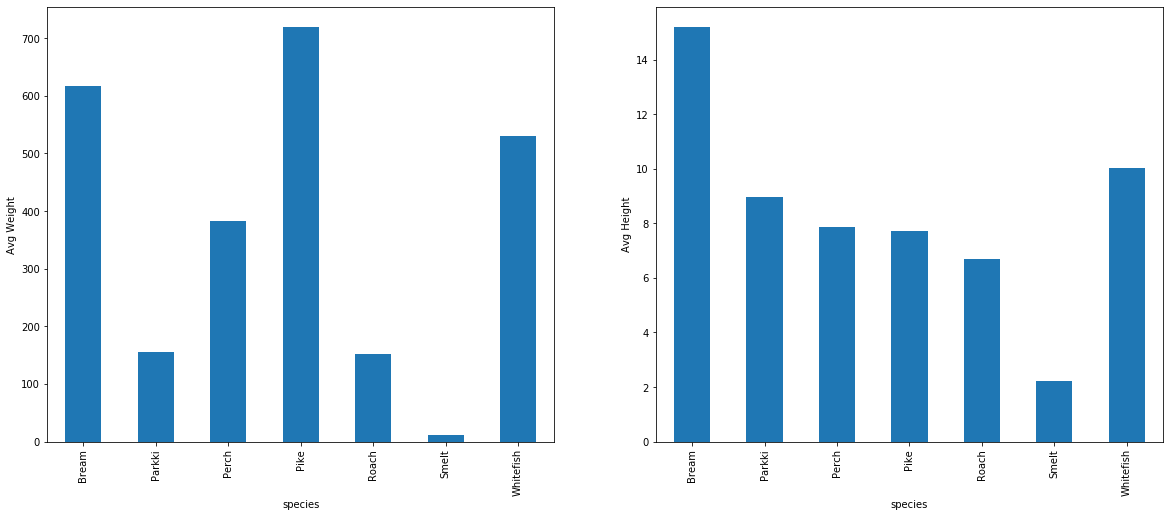

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
fish.groupby(['species'])['weight'].mean().plot(kind='bar')
plt.ylabel('Avg Weight')
plt.subplot(1,2,2)
fish.groupby(['species'])['height'].mean().plot(kind='bar')
plt.ylabel('Avg Height')


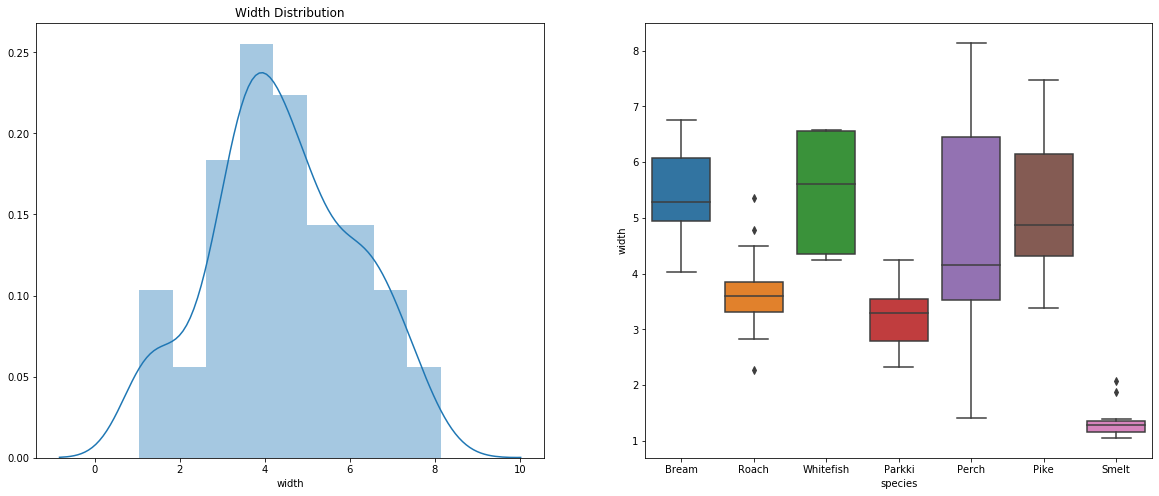

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(fish.width)
plt.title('Width Distribution')

plt.subplot(1,2,2)
sns.boxplot(fish.species,fish.width)

##### 'Perch' have the high width range and 'Smelt' have smallest width range


## Adding new feature

In [48]:
fish['avglength'] = (fish.length1+fish.length2+fish.length3)/3

In [49]:
fish.head()

,species,weight,length1,length2,length3,height,width,avglength
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333


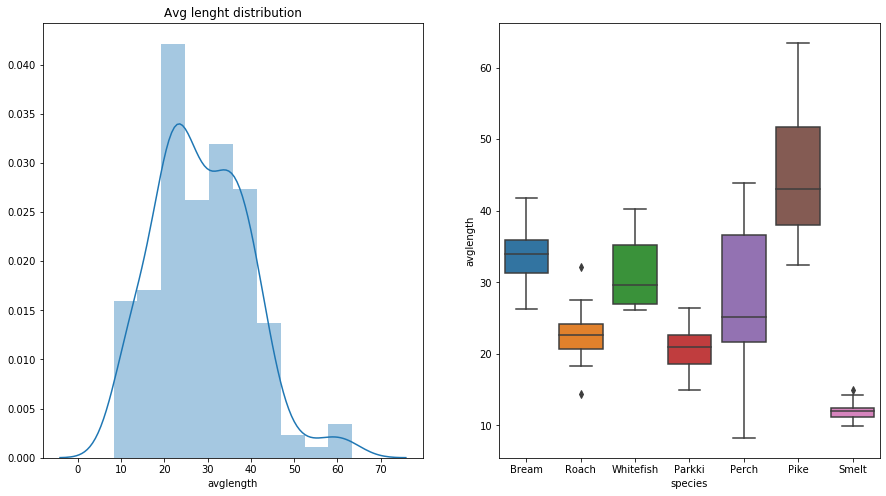

In [50]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(fish.avglength)
plt.title('Avg lenght distribution')

plt.subplot(1,2,2)
sns.boxplot(x=fish.species,y=fish.avglength)

## Vizualising the numerical data

In [52]:
fish.select_dtypes(include=['int','float'])

,weight,length1,length2,length3,height,width,avglength
0,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333
...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667
155,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333
156,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667
157,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333


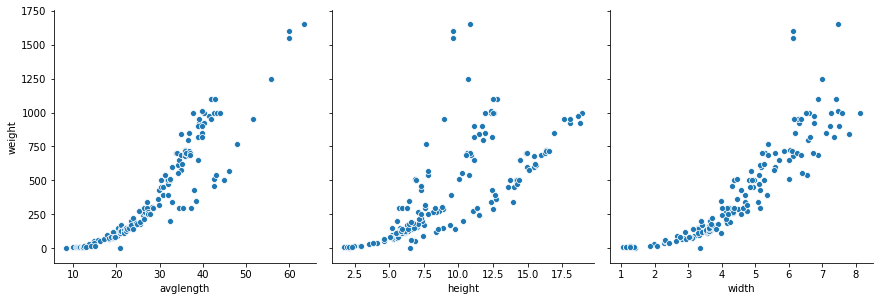

In [53]:
def pp(x,y,z):
    sns.pairplot(fish,x_vars=[x,y,z],y_vars='weight',height=4)
    plt.show()
    
pp('avglength','height','width')

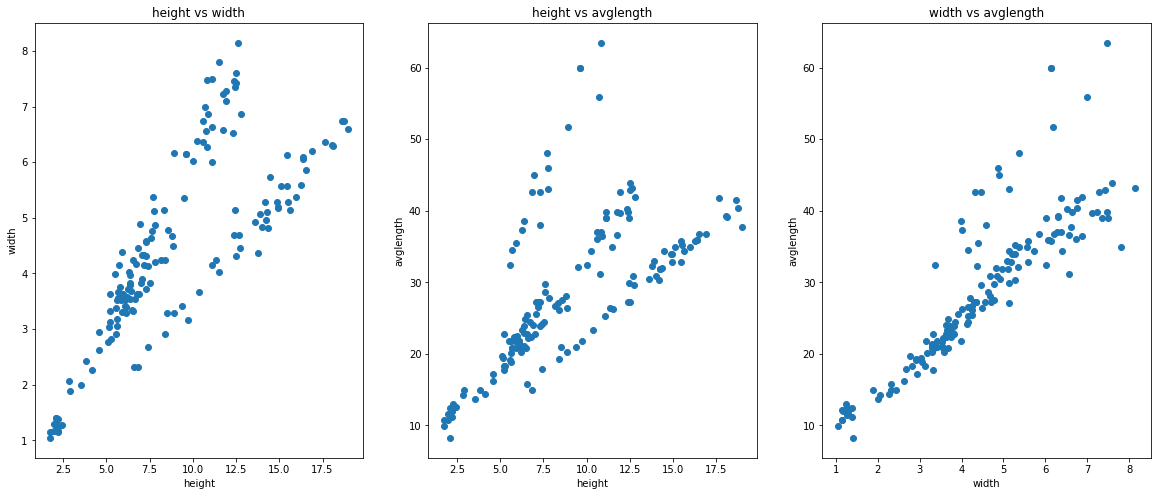

In [57]:
def scatter(x,y,fig):
    plt.subplot(1,3,fig)
    plt.scatter(fish[x],fish[y])
    plt.title(x+' vs '+y)
    plt.xlabel(x)
    plt.ylabel(y)
plt.figure(figsize=(20,8))
scatter('height','width',1)
scatter('height','avglength',2)
scatter('width','avglength',3)

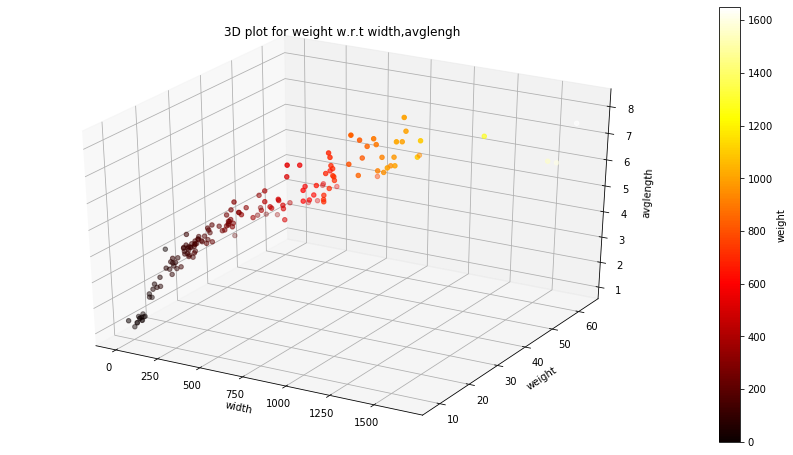

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')

plot = ax.scatter(fish['weight'],fish.avglength,fish.width,c=fish['weight'],cmap='hot')

ax.set_xlabel('width')
ax.set_ylabel('weight')
ax.set_zlabel('avglength')

plt.title("3D plot for weight w.r.t width,avglengh")

lab = fig.colorbar(plot)
lab.set_label('weight')

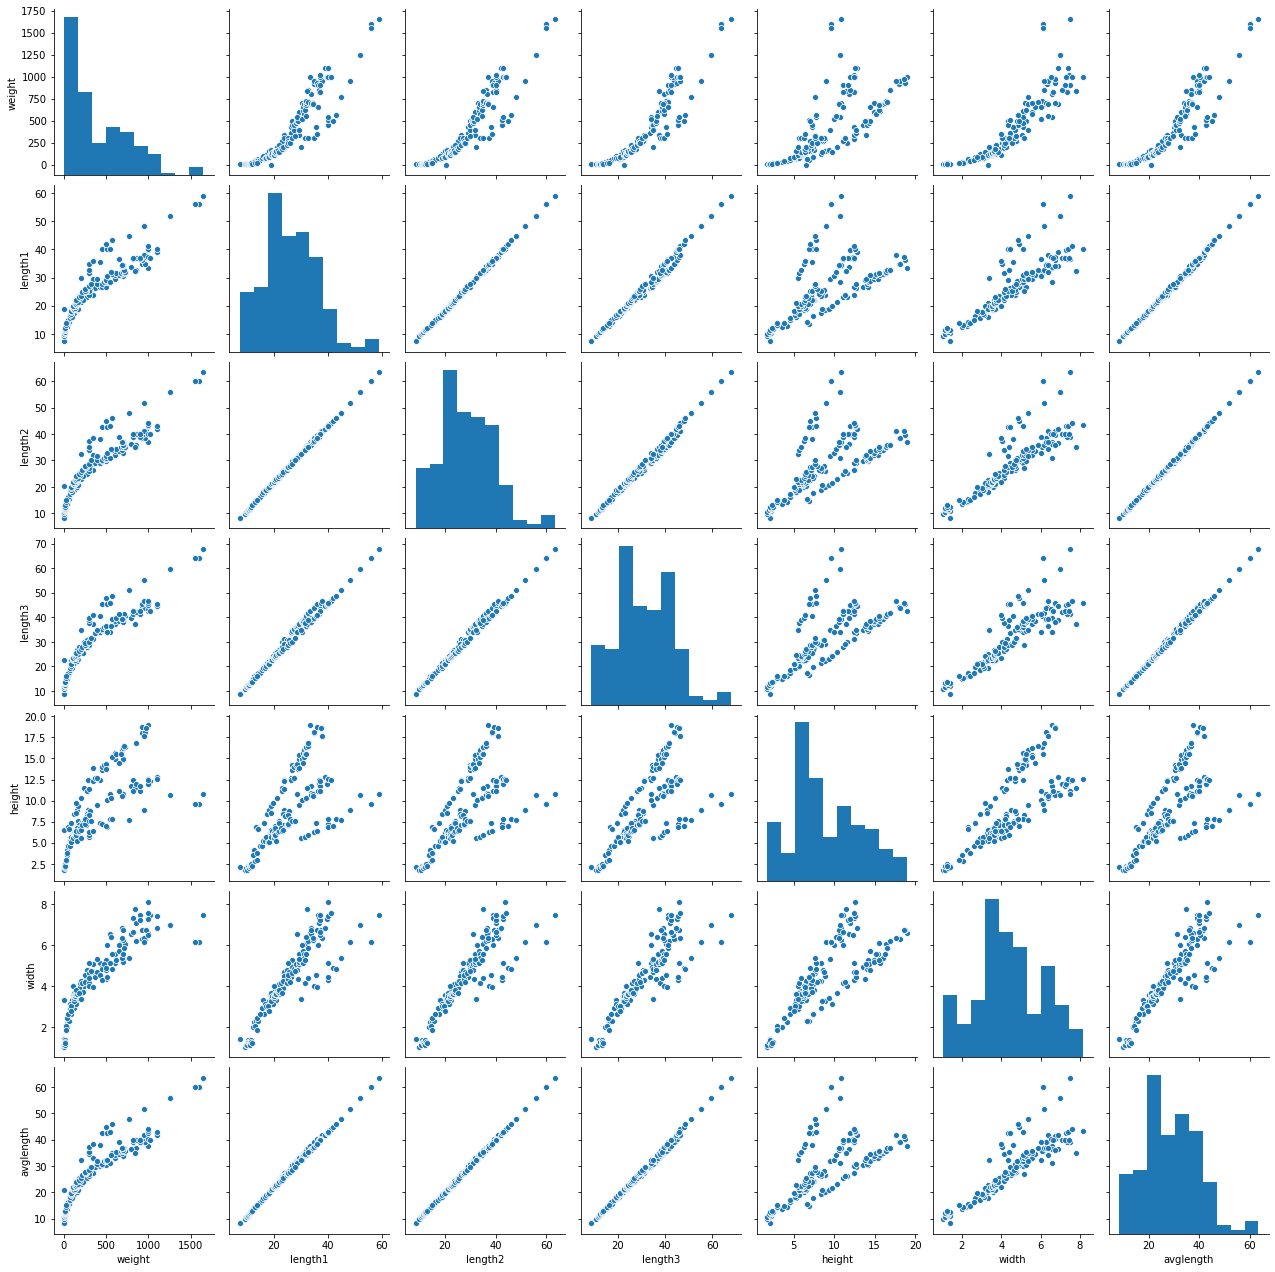

In [60]:
sns.pairplot(fish)
plt.show()

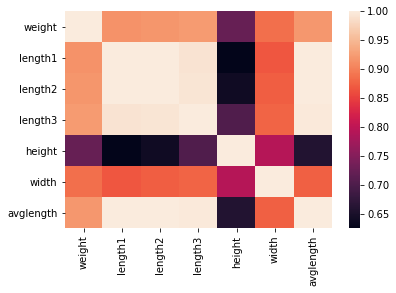

In [61]:
sns.heatmap(fish.corr())

##### Avg lenght is more positively related to weight than widht and height

## Getting dummy for catagorical data

In [72]:
dummy = pd.get_dummies(fish['species'])
dummy

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [99]:
fish_lr = pd.concat([fish,dummy],axis=1)
fish_lr

,species,weight,length1,length2,length3,height,width,avglength,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333,0,0,0,0,0,1,0


In [100]:
fish_lr.drop(['species'],axis=1,inplace=True)
fish_lr

,weight,length1,length2,length3,height,width,avglength,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333,0,0,0,0,0,1,0


In [101]:
fish_lr.columns = fish_lr.columns.str.lower()
fish_lr

,weight,length1,length2,length3,height,width,avglength,bream,parkki,perch,pike,roach,smelt,whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333,0,0,0,0,0,1,0


## Splitting dataset into Training and testing sets

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [185]:
y = fish_lr['weight']
X = fish_lr.drop(['weight'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.fit_transform(X_test)

print("X_train.shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

X_train.shape:  (111, 13)
y_train shape:  (111,)


## Building Model

In [186]:
from sklearn.linear_model import LinearRegression


In [196]:
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 Training score: ",lr.score(X_train,y_train))
print("R2 Testing score: ",lr.score(X_test,y_test))

R2 Training score:  0.9413973881951337
R2 Testing score:  0.8998934309133816


### On looking at the training and testing scores it seems that our model is overfitting, as it is doing good with the training but not with the testing data

In [188]:
test_pred = pd.DataFrame(y_pred,columns=['Predicted_weight'])
y_test_index = y_test.reset_index()
y_test_index = y_test_index.drop(['index'],axis=1)
test_pred = pd.concat([y_test_index,test_pred],axis=1)

In [189]:
test_pred.head(15)

,weight,Predicted_weight
0,180.0,279.535019
1,265.0,386.223591
2,950.0,1011.642700
3,87.0,78.083291
4,145.0,232.711631
5,600.0,664.064990
6,390.0,587.804631
7,450.0,572.664677
8,700.0,663.684808
9,180.0,265.415940


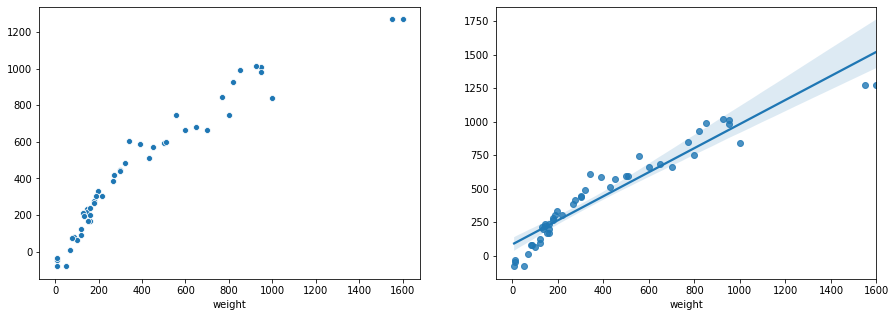

In [190]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred)

plt.subplot(1,2,2)
sns.regplot(y_test,y_pred)

### Lasso Regression

In [191]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [192]:
param_grid = {'alpha':[0,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Lasso(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

print("Best Parmeters: {}".format(grid_search.best_params_))

Best Parmeters: {'alpha': 1}


E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351253.8671829488, tolerance: 1078.7290289886366
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_de

In [193]:
train_score = []
test_score = []
alpha_range = [0,0.01,0.1,1,10,100]

for alpha in alpha_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score.append(lasso.score(X_train,y_train))
    test_score.append(lasso.score(X_test,y_test))


E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406799.67539112165, tolerance: 1339.806312990991
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272775.95329999644, tolerance: 1339.806312990991
  positive)


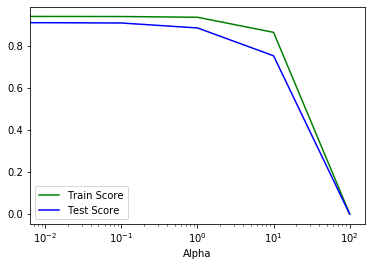

In [197]:
plt.plot(alpha_range,train_score,c='g',label='Train Score')
plt.plot(alpha_range,test_score,c='b',label='Test Score')
plt.xscale('log')
plt.xlabel('Alpha')
plt.legend()


In [198]:
lasso = Lasso(1)
lasso.fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.9356448325826682
0.8848383576081092


### Ridge Regression

In [199]:
from sklearn.linear_model import Ridge
param_grid = {'alpha':[0,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Ridge(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

print("Best Parmeters: {}".format(grid_search.best_params_))

Best Parmeters: {'alpha': 0.1}


E:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61956e-18): result may not be accurate.
  overwrite_a=True).T


In [200]:
alpha_range = [0.01,0.1,1,10,100]
train_score_list = []
test_score_list = []

for alpha in alpha_range:
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test,y_test))

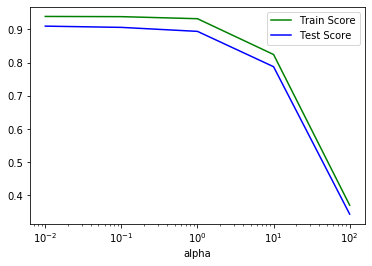

In [201]:
#comparing the different alpha values to see which produces the best score

plt.plot(alpha_range,train_score_list,c='g',label='Train Score')
plt.plot(alpha_range,test_score_list,c='b',label='Test Score')
plt.xlabel('alpha')
plt.xscale('log')
plt.legend()


In [202]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.9063037003166582

##### Regularization does not help us in imroving the score

### RFE

In [203]:
from sklearn.feature_selection import RFE

In [204]:
#RFE with 8 features

In [205]:
lr = LinearRegression()
rfe_8 = RFE(lr,8)
rfe_8.fit(X_train,y_train)

print("RFE support: \n",rfe_8.support_)
print("RFE ranking: \n",rfe_8.ranking_)

RFE support: 
 [ True  True False  True  True  True  True False False  True False  True
 False]
RFE ranking: 
 [1 1 3 1 1 1 1 4 5 1 6 1 2]


In [206]:
print("R2 score: ",rfe_8.score(X_test,y_test))

R2 score:  0.908954457516036


In [207]:
#RFE with 6 features

rfe_6 = RFE(lr,9)

rfe_6.fit(X_train,y_train)

print("Score: ",rfe_6.score(X_test,y_test))

Score:  0.8969454653164801


### We can add more features for more accuracy

#### We add Polynomial Features

In [255]:
def polyfeatures(x,d):
    m = len(x)
    xpoly = np.zeros((m,d))
    for i in range(m):
        for j in range(d):
            xpoly[i][j] = x[i]**(j+1)
    return xpoly

In [283]:
d = 10
X_poly = polyfeatures(X['avglength'],d)

In [284]:
X_poly = pd.DataFrame(X_poly)
Xpolynomial = pd.concat([X,X_poly],axis=1)

In [285]:
Xpolynomial.head()

,length1,length2,length3,height,width,avglength,bream,parkki,perch,pike,...,0,1,2,3,4,5,6,7,8,9
0,23.2,25.4,30.0,11.5200,4.0200,26.200000,1,0,0,0,...,26.200000,686.440000,17984.72800,471199.873600,1.234544e+07,3.234504e+08,8.474402e+09,2.220293e+11,5.817168e+12,1.524098e+14
1,24.0,26.3,31.2,12.4800,4.3056,27.166667,1,0,0,0,...,27.166667,738.027778,20049.75463,544685.000772,1.479728e+07,4.019927e+08,1.092080e+10,2.966818e+11,8.059854e+12,2.189594e+14
2,23.9,26.5,31.1,12.3778,4.6961,27.166667,1,0,0,0,...,27.166667,738.027778,20049.75463,544685.000772,1.479728e+07,4.019927e+08,1.092080e+10,2.966818e+11,8.059854e+12,2.189594e+14
3,26.3,29.0,33.5,12.7300,4.4555,29.600000,1,0,0,0,...,29.600000,876.160000,25934.33600,767656.345600,2.272263e+07,6.725898e+08,1.990866e+10,5.892963e+11,1.744317e+13,5.163178e+14
4,26.5,29.0,34.0,12.4440,5.1340,29.833333,1,0,0,0,...,29.833333,890.027778,26552.49537,792149.445216,2.363246e+07,7.050350e+08,2.103354e+10,6.275007e+11,1.872044e+13,5.584931e+14


In [286]:
X_train_poly,X_test_poly,y_train_poly,y_test_poly = train_test_split(Xpolynomial,y,random_state=0)
print(X_train_poly.shape)

(119, 23)


In [287]:
scalar = MinMaxScaler()

X_train_poly = scalar.fit_transform(X_train_poly)

X_test_poly = scalar.fit_transform(X_test_poly)

In [288]:
lr = LinearRegression()

lr.fit(X_train_poly,y_train_poly)
print("R2 Training score: ",lr.score(X_train_poly,y_train_poly))
print("R2 Testing score: ",lr.score(X_test_poly,y_test_poly))

R2 Training score:  0.9852873335284769
R2 Testing score:  0.8666388504148191


In [289]:
y_pred = lr.predict(X_test_poly)
test_pred = pd.DataFrame(y_pred,columns=['Predicted_weight'])
y_test_index = y_test_poly.reset_index()
y_test_index = y_test_index.drop(['index'],axis=1)
test_pred = pd.concat([y_test_index,test_pred],axis=1)
test_pred.head(15)

,weight,Predicted_weight
0,390.0,404.560345
1,0.0,194.822375
2,170.0,224.301560
3,160.0,252.179898
4,556.0,602.789592
5,900.0,815.125732
6,800.0,670.531895
7,300.0,237.001649
8,975.0,946.979637
9,115.0,195.488457


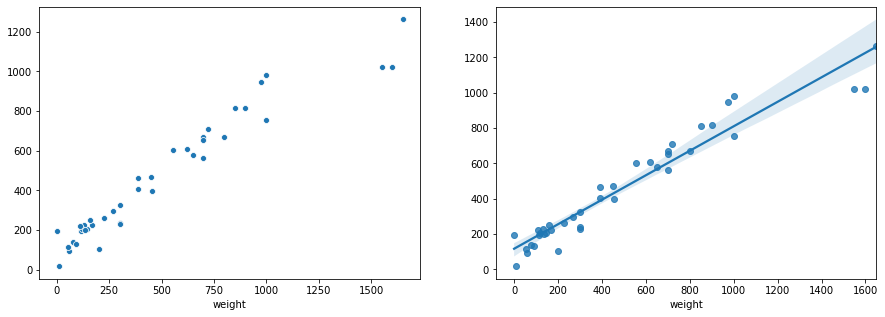

In [290]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(y_test_poly,y_pred)

plt.subplot(1,2,2)
sns.regplot(y_test_poly,y_pred)

### Lasso

In [291]:
param_grid = {'alpha':[0,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Lasso(),param_grid,cv=5)
grid_search.fit(X_train_poly,y_train_poly)

print("Best Parmeters: {}".format(grid_search.best_params_))

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87560.63639298477, tolerance: 1036.4467297473684
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_de

Best Parmeters: {'alpha': 0}


E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93627.12632999361, tolerance: 1219.2124339831935
  positive)


In [293]:
lasso = Lasso(0)
lasso.fit(X_train_poly,y_train_poly)
print(lasso.score(X_train_poly,y_train_poly))
print(lasso.score(X_test_poly,y_test_poly))

0.9846413760686293
0.8483877004788252


E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93627.12632999361, tolerance: 1219.2124339831935
  positive)


### Ridge

In [294]:
from sklearn.linear_model import Ridge
param_grid = {'alpha':[0,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(Ridge(),param_grid,cv=5)
grid_search.fit(X_train_poly,y_train_poly)

print("Best Parmeters: {}".format(grid_search.best_params_))

Best Parmeters: {'alpha': 0.01}


In [295]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_poly, y_train_poly)
ridge.score(X_test_poly,y_test_poly)

0.8532627748182892

#### RFE

In [296]:
lr = LinearRegression()
rfe_8 = RFE(lr,16)
rfe_8.fit(X_train_poly,y_train_poly)
print("R2 score: ",rfe_8.score(X_test_poly,y_test_poly))



R2 score:  0.8801980384753003
